In [1]:
#  Importing the Dependencies

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

In [2]:
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [3]:
#  Data Collection
os.chdir(r'D:\6th semester\GT')
big_mart_data=pd.read_csv('Train.csv')
test_data=pd.read_csv('Test.csv')

In [4]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [5]:
# getting some information about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#preprocessing of the training dataset

In [7]:
#column information
big_mart_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
#summary statistics train
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
#summary statistics test
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
#missing values in decsending order
print("Train:\n")
print(big_mart_data.isnull().sum().sort_values(ascending=False),"\n\n",big_mart_data.isnull().sum()/big_mart_data.shape[0] *100,"\n\n")
print("Test:\n")
print(test_data.isnull().sum().sort_values(ascending=False),"\n\n",test_data.isnull().sum()/test_data.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

In [11]:
#value counts for Outlet_Size and Item_Weight:
print("Outlet_Size:\n", big_mart_data.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", test_data.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 10.500    57
17.600    53
15.600    48
20.250    47
19.350    46
          ..
6.980      1
6.320      1
5.465      1
5.945      1
7.670      1
Name: Item_Weight, Length: 410, dtype: int64 




In [12]:
print("test mode, train mode\n",[big_mart_data['Outlet_Size'].mode().values[0], test_data['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [13]:
#train
big_mart_data['Outlet_Size'] = big_mart_data['Outlet_Size'].fillna(
big_mart_data['Outlet_Size'].dropna().mode().values[0])

#test
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna(
test_data['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
big_mart_data['Outlet_Size'].isnull().sum(),test_data['Outlet_Size'].isnull().sum()

(0, 0)

Text(0.5, 1.0, 'Item_Weight Boxplot')

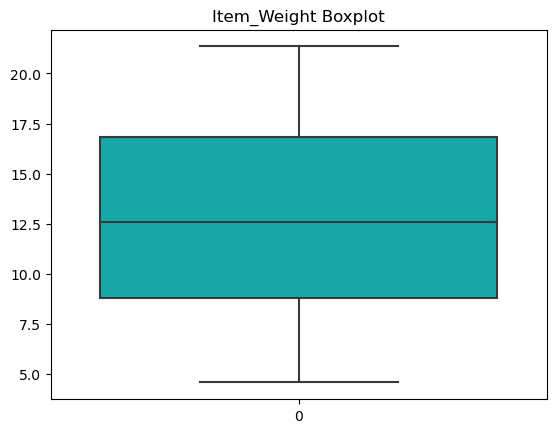

In [14]:
sns.boxplot(data=big_mart_data['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

In [15]:
#There are no outliers so we will fill the missing data with the mean value for maximum efficiency
#train
big_mart_data['Item_Weight'] = big_mart_data['Item_Weight'].fillna(
big_mart_data['Item_Weight'].dropna().mean())

#test
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(
test_data['Item_Weight'].dropna().mean())

#checking if we filled missing values
big_mart_data['Item_Weight'].isnull().sum(),test_data['Item_Weight'].isnull().sum()

(0, 0)

In [16]:
print("train:\n")
print(big_mart_data.info())
print("\n\ntest:\n")
print(test_data.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


test:

<class 'pandas.core.fra

In [17]:
#Data Exploration
#list of all the numeric columns
num = big_mart_data.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = big_mart_data.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  big_mart_data[num]
#categoric df
BM_cat = big_mart_data[cat]

#print(num)
#print(cat)

[big_mart_data[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

In [18]:
#train
big_mart_data['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
test_data['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
big_mart_data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
#creating our new column for both datasets
big_mart_data['Outlet_Age'], test_data['Outlet_Age']= big_mart_data['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), test_data['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)


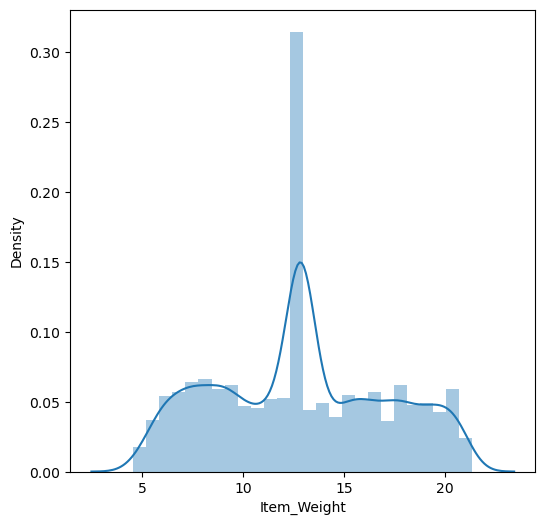

In [20]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

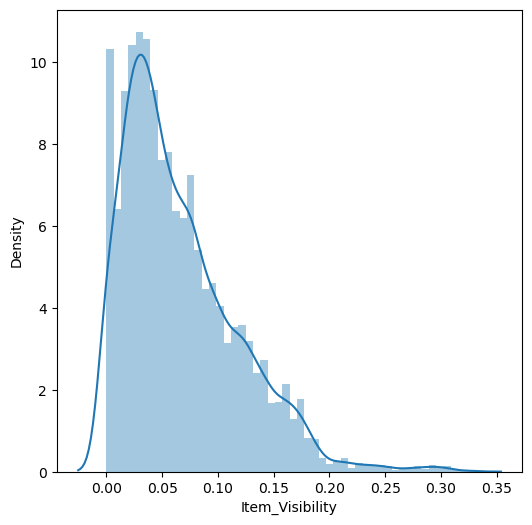

In [21]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

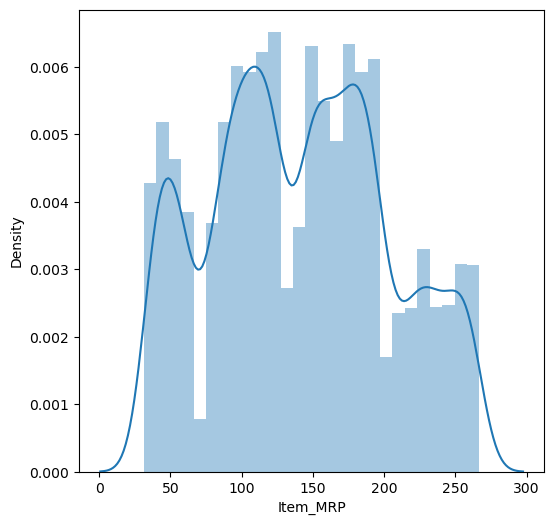

In [22]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

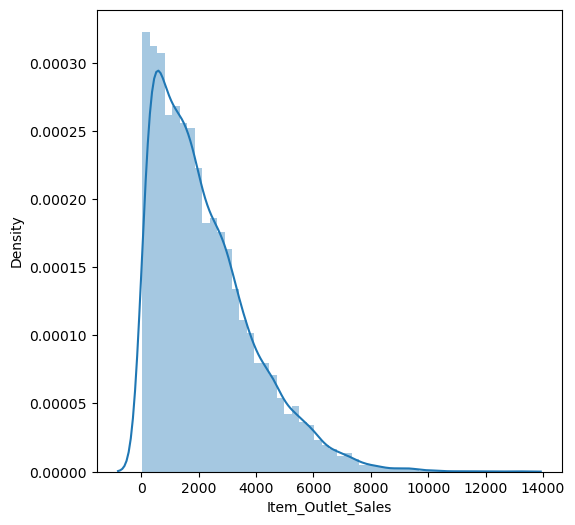

In [23]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

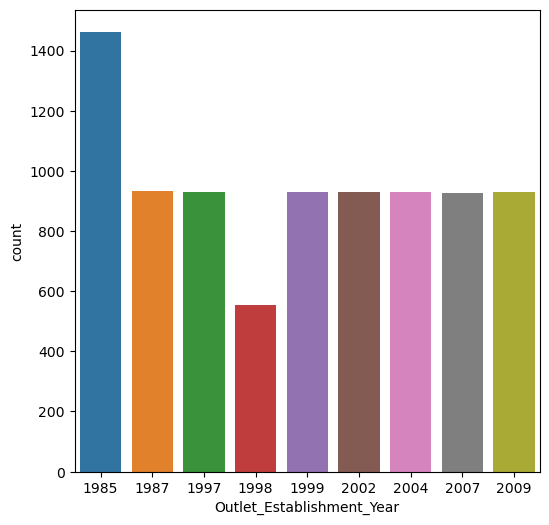

In [24]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

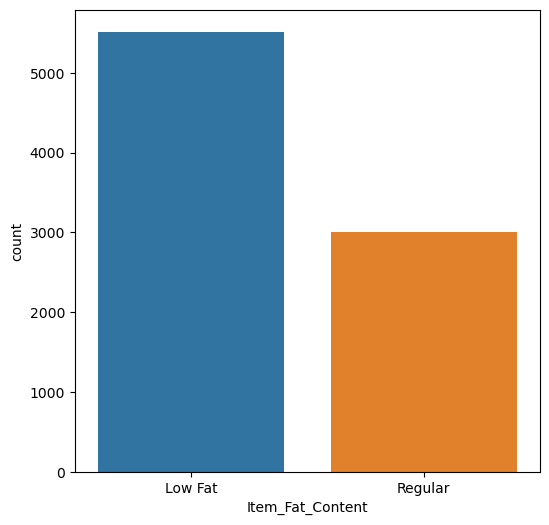

In [25]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

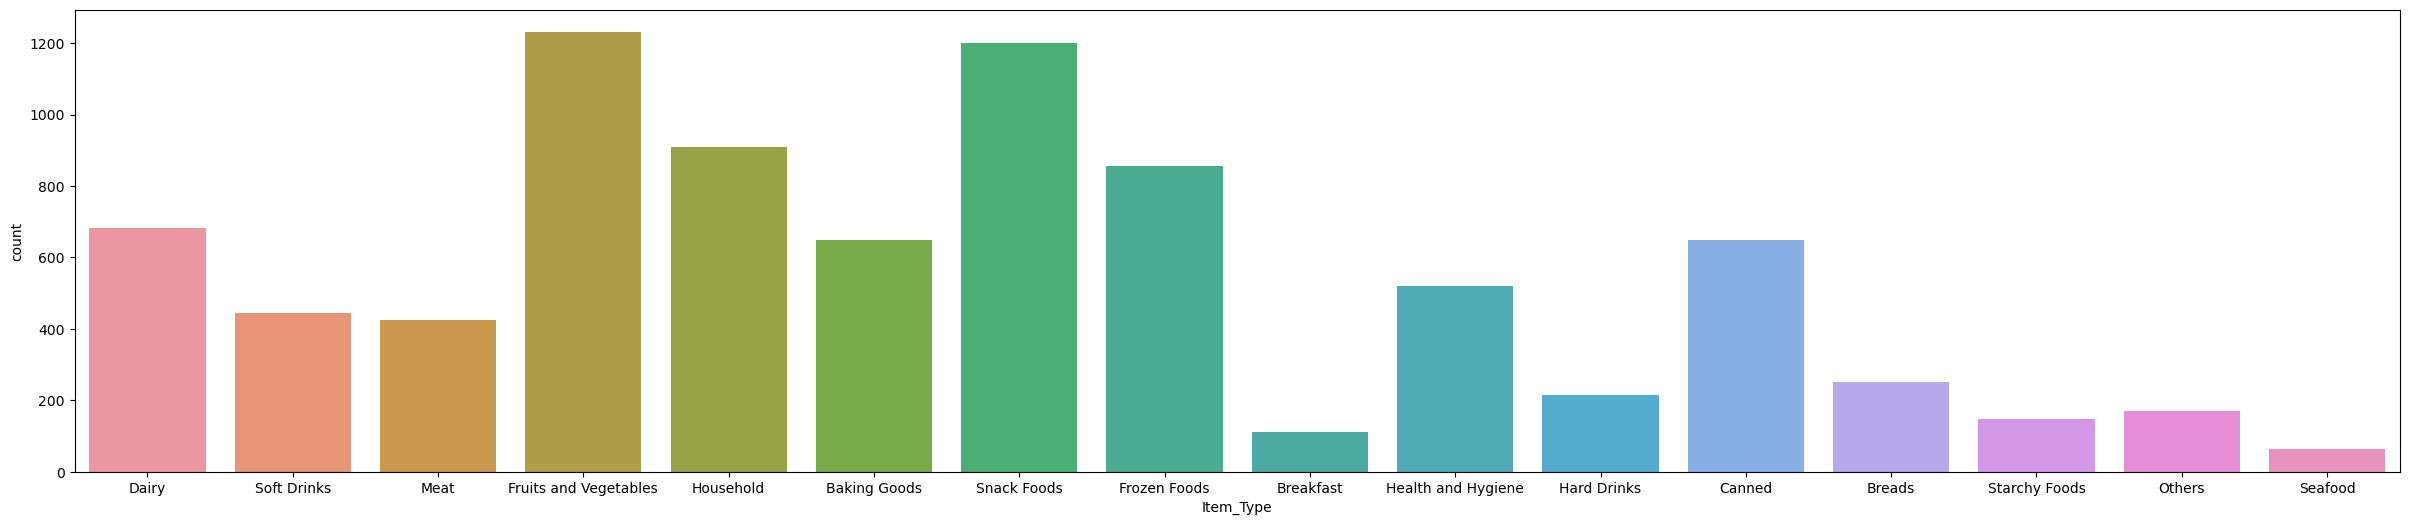

In [26]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

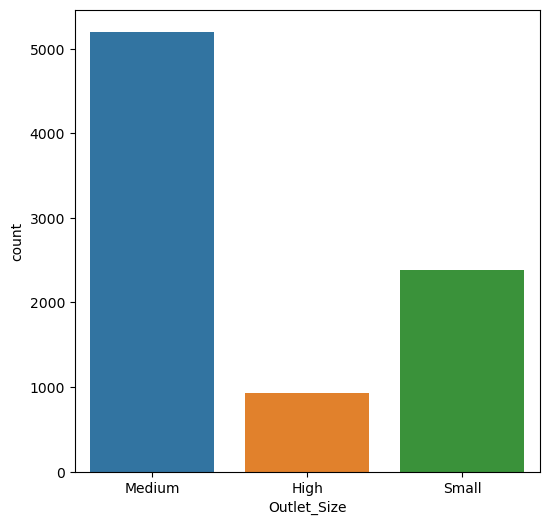

In [27]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


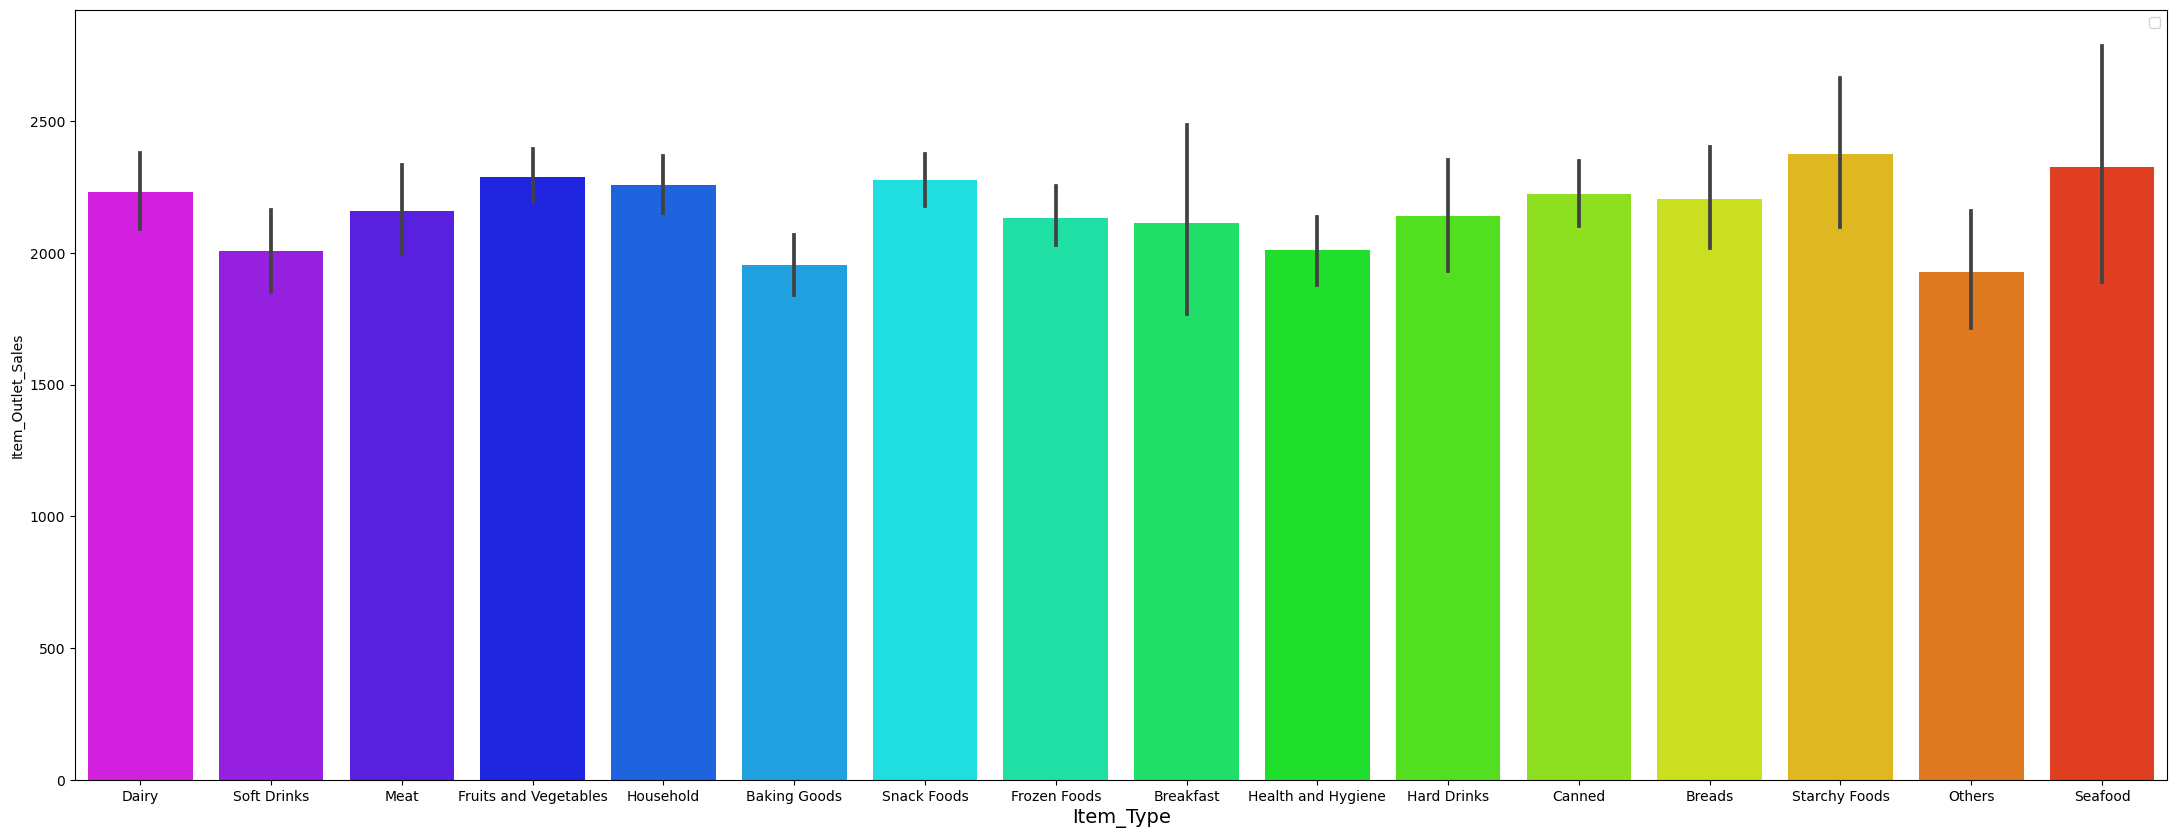

In [28]:
#Multivarient Plots
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=big_mart_data ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


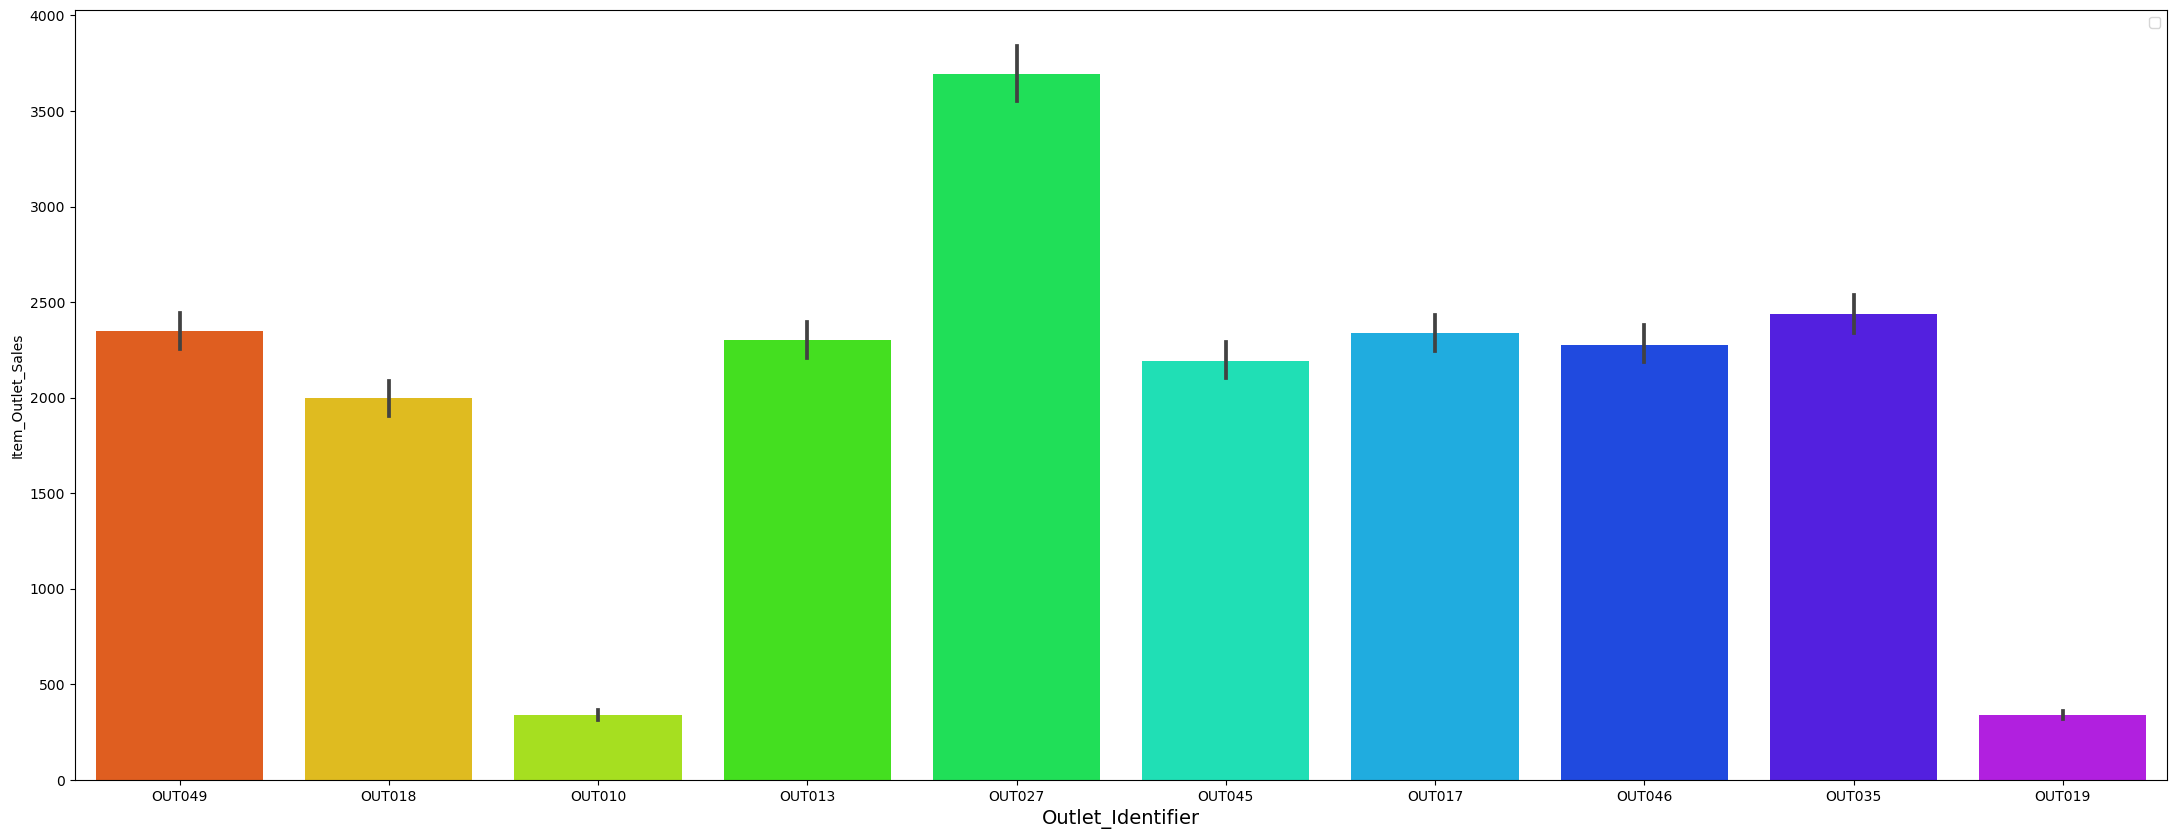

In [29]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=big_mart_data ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


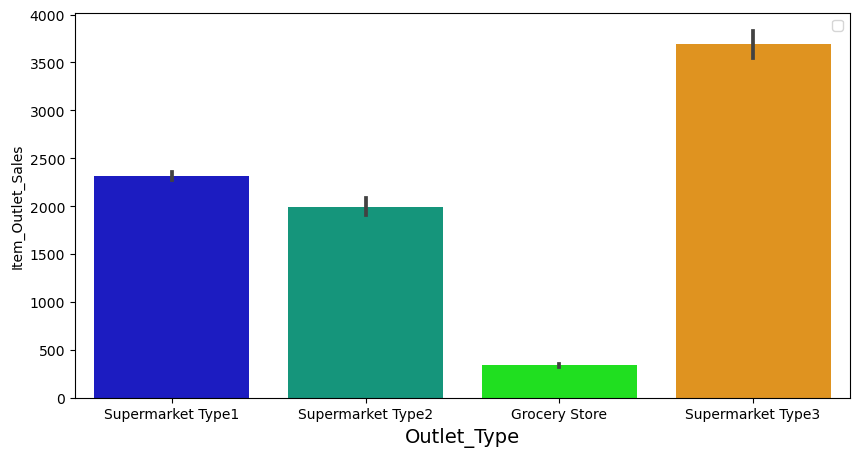

In [30]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=big_mart_data ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


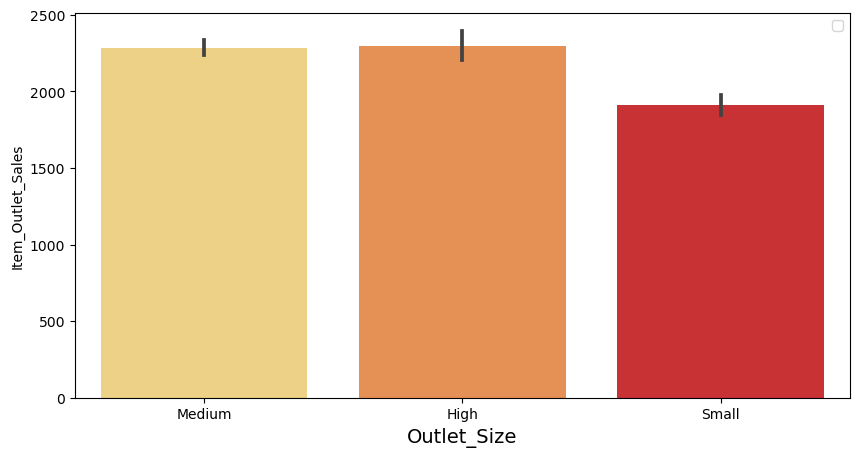

In [31]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=big_mart_data ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

In [32]:
# Label Encoding
encoder = LabelEncoder()

In [33]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [34]:
test_data['Item_Identifier'] = encoder.fit_transform(test_data['Item_Identifier'])

test_data['Item_Fat_Content'] = encoder.fit_transform(test_data['Item_Fat_Content'])

test_data['Item_Type'] = encoder.fit_transform(test_data['Item_Type'])

test_data['Outlet_Identifier'] = encoder.fit_transform(test_data['Outlet_Identifier'])

test_data['Outlet_Size'] = encoder.fit_transform(test_data['Outlet_Size'])

test_data['Outlet_Location_Type'] = encoder.fit_transform(test_data['Outlet_Location_Type'])

test_data['Outlet_Type'] = encoder.fit_transform(test_data['Outlet_Type'])

In [35]:
# Splitting features and Target
X = big_mart_data.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'], axis=1)
Y = big_mart_data['Item_Outlet_Sales']
print(X)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0           9.300                 0         0.016047  249.8092            1   
1           5.920                 1         0.019278   48.2692            1   
2          17.500                 0         0.016760  141.6180            1   
3          19.200                 1         0.000000  182.0950            1   
4           8.930                 0         0.000000   53.8614            0   
...           ...               ...              ...       ...          ...   
8518        6.865                 0         0.056783  214.5218            0   
8519        8.380                 1         0.046982  108.1570            1   
8520       10.600                 0         0.035186   85.1224            2   
8521        7.210                 1         0.145221  103.1332            1   
8522       14.800                 0         0.044878   75.4670            2   

      Outlet_Location_Type  Outlet_Age  
0         

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(big_mart_data.shape, X_train.shape, X_test.shape)

(8523, 13) (6818, 7) (1705, 7)


In [38]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [39]:
#model
LR = LinearRegression(normalize=True)

#fit
LR.fit(X_train, Y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(Y_test, y_predict),2)
LR_MSE = round(MSE(Y_test, y_predict),2)
LR_R_2 = round(R2(Y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, Y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,Y,5)

 Mean Absolute Error: 1065.54

 Mean Squared Error: 2065943.57

 R^2 Score: 0.3308

LinearRegression(normalize=True) Scores:
0.36
0.35
0.35
0.35
0.33
Average LinearRegression(normalize=True) score: 0.3483


In [40]:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, Y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(Y_test, y_predict),2)
RFR_MSE = round(MSE(Y_test, y_predict),2)
RFR_R_2 = round(R2(Y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, Y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,Y,5)


 Mean Absolute Error: 1005.52

 Mean Squared Error: 1848500.36

 R^2 Score: 0.4012

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.55
0.54
0.53
0.54
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5444
